---
format: 
    html: 
        code-fold: true 
        embed-resources: true
---

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import seaborn as sns

df = pd.read_csv('../data/cleaned_security_incidents.csv')

In [2]:
df.columns

Index(['incident_id', 'year', 'month', 'day', 'country_code', 'country',
       'region', 'district', 'city', 'un', 'ingo', 'icrc', 'nrcs_and_ifrc',
       'nngo', 'other', 'nationals_killed', 'nationals_wounded',
       'nationals_kidnapped', 'total_nationals', 'internationals_killed',
       'internationals_wounded', 'internationals_kidnapped',
       'total_internationals', 'total_killed', 'total_wounded',
       'total_kidnapped', 'total_affected', 'gender_male', 'gender_female',
       'gender_unknown', 'means_of_attack', 'attack_context', 'location',
       'latitude', 'longitude', 'motive', 'actor_type', 'actor_name',
       'details', 'verified', 'source'],
      dtype='object')

In [5]:
# Function to create styled tables with "Unknown" highlighted in red
def create_styled_table(series_counts, title):
    # Convert to DataFrame for styling
    df_counts = series_counts.reset_index()
    df_counts.columns = ['Category', 'Count']
    
    # Define styling function
    def highlight_unknown(row):
        # Check if the category contains any form of "unknown" (case insensitive)
        if ('unknown' in str(row['Category']).lower()):
            return ['background-color: rgba(255, 0, 0, 0.2)']*len(row)
        else:
            return ['background-color: transparent']*len(row)
    
    # Apply styling
    styled_df = df_counts.style.apply(highlight_unknown, axis=1)
    
    # Add title and other formatting
    styled_df = styled_df.set_caption(title).set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), 
                                         ('font-size', '1.1em'),
                                         ('text-align', 'center')]},
        {'selector': 'th', 'props': [('text-align', 'center'), 
                                    ('background-color', '#f2f2f2')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])
    
    return styled_df

# Get value counts for each category
means_counts = df['means_of_attack'].value_counts()
context_counts = df['attack_context'].value_counts()
actor_counts = df['actor_type'].value_counts()
motive_counts = df['motive'].value_counts()
location_counts = df['location'].value_counts()
actor_name_counts = df['actor_name'].value_counts()

# Create styled tables
styled_means = create_styled_table(means_counts, 'Means of Attack')
styled_context = create_styled_table(context_counts, 'Attack Context')
styled_actor = create_styled_table(actor_counts, 'Actor Type')
styled_motive = create_styled_table(motive_counts, 'Motive')
styled_location = create_styled_table(location_counts, 'Location')
styled_actor_name = create_styled_table(actor_name_counts, 'Actor Name')

# # Now display all 6 tables neatly
# tables = [styled_means, styled_actor, styled_context, styled_motive, styled_location, styled_actor_name]
# captions = ['Means of Attack', 'Actor Type', 'Attack Context', 'Motive', 'Location', 'Actor Name']

# display_side_by_side(tables, captions)


# Display tables in a 2x2 grid using grid_items from IPython
from IPython.display import display, HTML

# Create a more explicit grid structure with inline HTML
grid_html = """
<style>
    .grid-container {
        display: grid;
        grid-template-columns: 1fr 1fr;
        grid-gap: 20px;
        width: 100%;
    }
    .grid-item {
        width: 100%;
    }
</style>

<div class="grid-container">
    <div class="grid-item" id="table1"></div>
    <div class="grid-item" id="table2"></div>
    <div class="grid-item" id="table3"></div>
    <div class="grid-item" id="table4"></div>
    <div class="grid-item" id="table5"></div>
    <div class="grid-item" id="table6"></div>
</div>
"""

# First display the grid structure
display(HTML(grid_html))

# Then inject each table into its respective grid cell using JavaScript
for i, (table_id, styled_table) in enumerate([
    ("table1", styled_means),
    ("table2", styled_actor),
    ("table3", styled_context),
    ("table4", styled_motive),
    ("table5", styled_location),
    ("table6",styled_actor_name)
]):
    # Convert styled table to HTML and inject into the grid
    table_html = styled_table.to_html()
    display(HTML(f"""
    <script>
        document.getElementById("{table_id}").innerHTML = `{table_html}`;
    </script>
    """))

# # Alternative approach that works well in most Jupyter environments
# from IPython.display import display_html
# from IPython.core.display import HTML, display

# def display_side_by_side(dfs, captions=None):
#     """Display tables side by side in Jupyter."""
#     if captions is None:
#         captions = [''] * len(dfs)
    
#     output = ""
#     for df, caption in zip(dfs, captions):
#         output += '<div style="flex: 50%; padding: 5px;">'
#         output += f'<h4 style="text-align: center;">{caption}</h4>'
#         output += df.to_html()
#         output += '</div>'
    
#     display_html(HTML('<div style="display: flex; flex-wrap: wrap;">'+output+'</div>'))

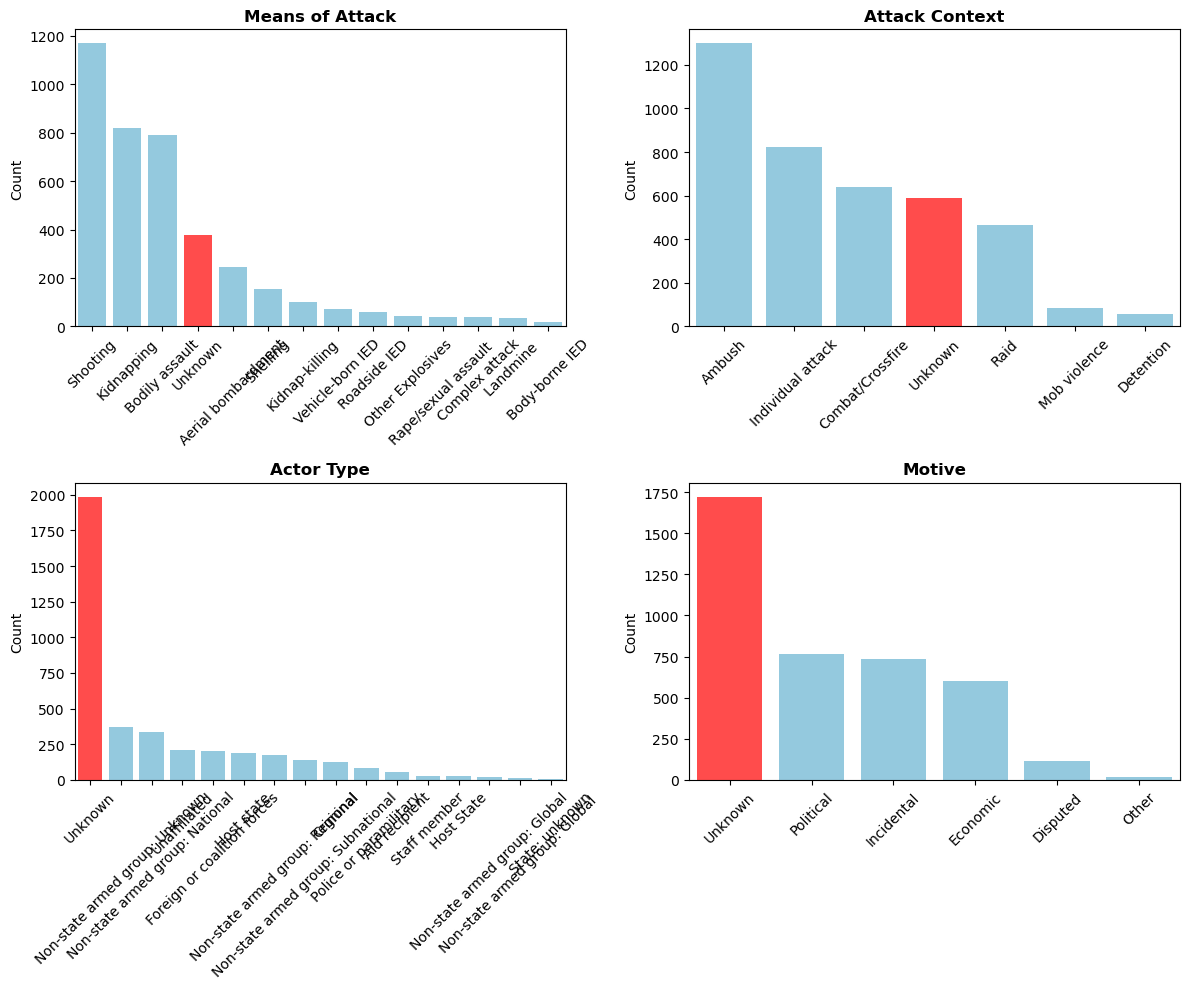

In [3]:

# Alternative approach using Matplotlib and Seaborn for better control of layout
# This is another option if you prefer plots over HTML tables

def plot_count_tables(df, variables, titles, nrows=2, ncols=2, figsize=(12, 10)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (var, title) in enumerate(zip(variables, titles)):
        counts = df[var].value_counts().reset_index()
        counts.columns = ['Category', 'Count']
        
        # Create bar plot
        sns.barplot(x='Category', y='Count', data=counts, ax=axes[i], color='skyblue')
        
        # Highlight Unknown in red if present
        if 'Unknown' in counts['Category'].values:
            unknown_idx = counts[counts['Category'] == 'Unknown'].index[0]
            unknown_bar = axes[i].patches[unknown_idx]
            unknown_bar.set_facecolor('red')
            unknown_bar.set_alpha(0.7)
        
        # Customize plot
        axes[i].set_title(title, fontsize=12, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_xlabel('')
        
    plt.tight_layout()
    plt.show()


plot_count_tables(
    df,
    variables=['means_of_attack', 'attack_context', 'actor_type', 'motive'],
    titles=['Means of Attack', 'Attack Context', 'Actor Type', 'Motive']
)

How many rows have X "Unknown"s? 

unknown_count
6     64
5    206
4    302
3    856
2    881
1    691
0    957
Name: count, dtype: int64

/var/folders/vs/3j3cdp2s1nn0lr6x50_9ycj00000gn/T/ipykernel_44171/335863915.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unknown_summary.index, y=unknown_summary.values, palette='Blues_d')


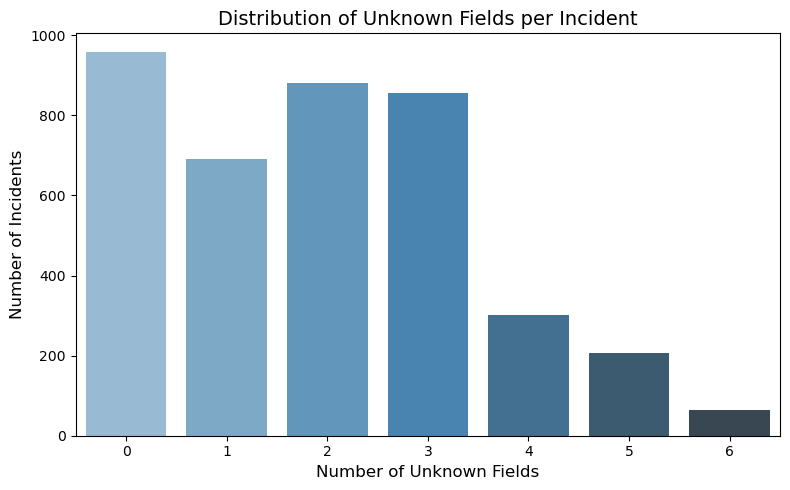

In [10]:
unknown_cols = ['means_of_attack', 'attack_context', 'location', 'motive', 'actor_type', 'actor_name']

# Create a new column counting unknowns per row
df['unknown_count'] = df[unknown_cols].apply(lambda row: sum(row.str.lower() == 'unknown'), axis=1)

# Count the occurrences
unknown_summary = df['unknown_count'].value_counts().sort_index(ascending=False)
display(unknown_summary)

# Plot distribution of unknown_count
plt.figure(figsize=(8, 5))
sns.barplot(x=unknown_summary.index, y=unknown_summary.values, palette='Blues_d')
plt.title('Distribution of Unknown Fields per Incident', fontsize=14)
plt.xlabel('Number of Unknown Fields', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.tight_layout()
plt.show()



In [19]:
# Filter rows with at least 1 unknown
filtered_summary = unknown_summary[unknown_summary.index > 0]

# Compute proportions
total_incidents = unknown_summary.sum()
proportions = (filtered_summary / total_incidents) * 100

# Average total affected for rows with at least 1 unknown
avg_affected = df[df['unknown_count'] > 0].groupby('unknown_count')['total_affected'].mean().round(2)

# Make sure all indexes align (use filtered_summary.index)
summary_table = pd.DataFrame({
    'Number of Unknown Fields': filtered_summary.index,
    'Incident Count': filtered_summary.values,
    'Proportion (%)': proportions.round(2).values,
    'Avg. Total Affected': avg_affected.loc[filtered_summary.index].values
}).sort_values(by='Number of Unknown Fields', ascending=False).reset_index(drop=True)

# Display nicely formatted table
display(summary_table.style.set_caption("Incidents by Number of Unknown Fields"))



,Number of Unknown Fields,Incident Count,Proportion (%),Avg. Total Affected
0,6,64,1.620000,1.220000
1,5,206,5.210000,1.650000
2,4,302,7.630000,1.630000
3,3,856,21.630000,1.740000
4,2,881,22.260000,1.730000
5,1,691,17.460000,1.920000


Which columns tend to be unknown together more? 

/var/folders/vs/3j3cdp2s1nn0lr6x50_9ycj00000gn/T/ipykernel_44171/1824388914.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  unknown_binary = df[unknown_cols].applymap(lambda x: 1 if str(x).lower() == 'unknown' else 0)


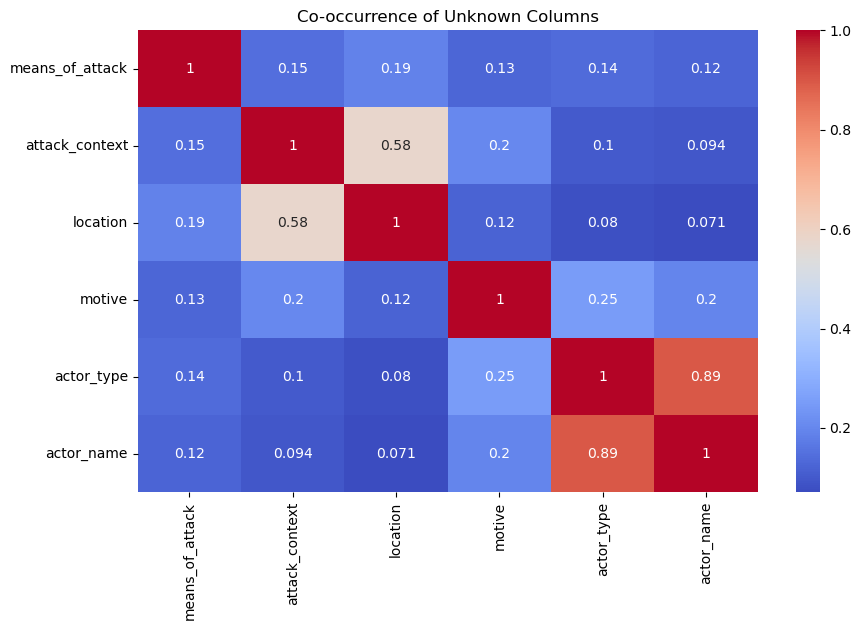

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to binary unknown indicator
unknown_binary = df[unknown_cols].applymap(lambda x: 1 if str(x).lower() == 'unknown' else 0)

# Co-occurrence heatmap
plt.figure(figsize=(10,6))
sns.heatmap(unknown_binary.corr(), annot=True, cmap='coolwarm')
plt.title('Co-occurrence of Unknown Columns')
plt.show()


## Interactive dashboard for exploring Unknowns

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define widget
unknown_selector = widgets.Dropdown(
    options=sorted(df['unknown_count'].unique(), reverse=True),
    description='Unknowns:',
    value=1
)

sort_selector = widgets.ToggleButtons(
    options=['year', 'total_affected'],
    description='Sort by:',
    button_style='info'
)

output = widgets.Output()

# Function to update output based on user selection
def update_dashboard(change):
    with output:
        clear_output(wait=True)
        
        # Filter dataframe by selected unknown_count
        num_unknowns = unknown_selector.value
        filtered_df = df[df['unknown_count'] == num_unknowns]

        # Display summary statistics
        print(f"## Summary for Incidents with {num_unknowns} Unknown Fields\n")

        if filtered_df.empty:
            print("No incidents found for this selection.")
            return

        top_countries = filtered_df['country'].value_counts().head(5)
        top_years = filtered_df['year'].value_counts().head(5)
        numeric_cols = ['total_killed', 'total_wounded', 'total_kidnapped', 'total_affected']
        avg_numeric = filtered_df[numeric_cols].mean().round(2)

        print("### Most Common Countries:")
        display(top_countries)

        print("\n### Most Common Years:")
        display(top_years)

        print("\n### Average Numeric Values:")
        display(avg_numeric.to_frame(name='Average').T)

        # Display sortable DataFrame
        print("\n### Individual Incident Details:")
        display(filtered_df.sort_values(by=sort_selector.value, ascending=False).reset_index(drop=True))

# Bind updates to widgets
unknown_selector.observe(update_dashboard, names='value')
sort_selector.observe(update_dashboard, names='value')

# Display the interactive dashboard
dashboard_ui = widgets.VBox([widgets.HBox([unknown_selector, sort_selector]), output])
display(dashboard_ui)

# Trigger initial display
update_dashboard(None)
